### Phase 3 
##### April 10th, 2022
#### Helen (Zhaolin) Li, Amaris (Jiayue) Han, Pie (Arisara) Vichitchoti, and Aaron (Yitian) Liang 

#### We used a separate Jupyter notebook to do model training on our datasets because we think it is more organized to divide EDA and model training phases into two. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### RandomForestClassifier - CVD dataset 

In [2]:
# Load the cardio data
cvd_df = pd.read_csv('new_cardio_data.csv')
cvd_df.head(10)

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp_cate
0,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Hypertension stage 2
1,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,Hypertension stage 1
2,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,Hypertension stage 2
3,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,Normal
4,5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,Normal
5,6,9,60.583562,1,157,93.0,130,80,3,1,0,0,1,0,Hypertension stage 1
6,7,12,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,Hypertension stage 1
7,8,13,48.405479,1,158,71.0,110,70,1,1,0,0,1,0,Normal
8,9,14,54.339726,1,164,68.0,110,60,1,1,0,0,0,0,Normal
9,10,15,61.726027,1,169,80.0,120,80,1,1,0,0,1,0,Normal


In [3]:
# Encode the bp_cate from categorical data to numeric data 
cvd_df["bp_cate"] = cvd_df["bp_cate"].astype('category')
cvd_df["bp_level"] = cvd_df["bp_cate"].cat.rename_categories({"Hypotension": 0, "Normal": 1, 
                                               "Elevated": 2, "Hypertension stage 1": 3,
                                                "Hypertension stage 2": 4})

In [4]:
# Drop a the first, the ap_hi, ap_lo, and bp_cate columns
cvd= cvd_df.iloc[: , 1:].drop(['ap_hi', 'ap_lo','bp_cate'], axis = 1)

In [5]:
# Convert the categorical type of bp_level back to numerical 
cvd["bp_level"]  = cvd["bp_level"].astype(int)

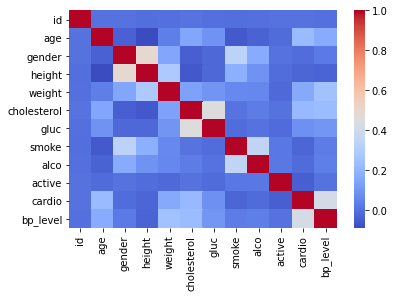

In [6]:
# Visualize the correlations between all numerical data 
plt.figure()
sns.heatmap(cvd.corr(), cmap='coolwarm')
# sns.catplot(x="cardio", y="age", kind="swarm", data=cvd)
plt.show()

In [7]:
# Split the data into training and test sets
X = cvd[['age', 'gender','gluc', 'bp_level', 'weight','cholesterol']]
y = cvd["cardio"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 7,
                                                    stratify = y
                                                   )

### RandomForestClassifier - CVD dataset

In [8]:
# Build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [9]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.6509358926772363


In [10]:
# Get the classification report for the model 
y_pred = rf.predict(X_test)

target_names = ["CVD", "no CVD"]
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         CVD       0.66      0.64      0.65      9503
      no CVD       0.64      0.66      0.65      9356

    accuracy                           0.65     18859
   macro avg       0.65      0.65      0.65     18859
weighted avg       0.65      0.65      0.65     18859



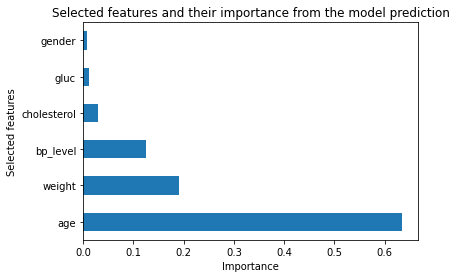

In [11]:
# Visualize the most important features that help predict the presence of CVDs. 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.title("Selected features and their importance from the model prediction")
plt.xlabel("Importance")
plt.ylabel("Selected features")
plt.show()

>Summary: The RandomForest Classifier model's accuracy to predict the presence of cardio was approximate 65%. Based on the classification report, the f-1 score for both CVD and no CVD was 0.65. Since the f-1 score was calculated based on precision and recall, we could say that an f-1 score with a value of 0.65 means that we have moderately low false positive and false negative predictions. Then, the most important selected feature from this model was age. 

### RandomForestRegression - CVD dataset

In [12]:
# Build the regressor
rf = RandomForestRegressor(n_estimators = 250, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=7)

In [13]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The probability of having cardio is: {}'.format(y_pred))

The probability of having cardio is: [0.64  0.964 0.128 ... 0.264 0.928 0.272]


In [14]:
# Evaluate the Predictions
mse = mean_squared_error(y_test, y_pred)

print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.2263116454408381


In [15]:
# Add corresponding CVD predictions to the X_test dataframe 
pred_y = list(y_pred)
X_test["P(cardio)"] = pred_y

<ipython-input-15-47bd10482d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["P(cardio)"] = pred_y


In [16]:
# Check the size of the test set
X_test

,age,gender,gluc,bp_level,weight,cholesterol,P(cardio)
50136,59.972603,1,1,1,58.0,3,0.640
45623,57.572603,1,1,4,63.0,3,0.964
27818,51.471233,1,1,1,60.0,1,0.128
55490,61.852055,2,1,3,95.0,1,0.512
7860,54.405479,2,1,3,72.0,1,0.480
...,...,...,...,...,...,...,...
24064,56.493151,1,1,1,77.0,1,0.480
34764,56.271233,1,1,4,78.0,1,0.696
26558,42.136986,2,1,1,69.0,1,0.264
44652,40.205479,1,2,4,90.0,1,0.928


In [17]:
# Find the average prediction of having CVDs 
print (f"Based on all input variables for the model, the average possibility of having CVDs is {sum(pred_y)/len(pred_y)}.")

Based on all input variables for the model, the average possibility of having CVDs is 0.4967508391620766.


In [18]:
# Merge the original cvd dataset and the X_test so we can locate the patient id and corresponding CVD possibility 
merged = pd.merge(left=cvd_df, left_index=True,
                  right=X_test, right_index=True,
                  how='inner', suffixes=('', '_remove'))
# Remove the duplicate columns
merged.drop([i for i in merged.columns if 'remove' in i],
               axis=1, inplace=True)

# Remove the "Unnamed:0" column
merged.iloc[: , 1:]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp_cate,bp_level,P(cardio)
0,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Hypertension stage 2,4,0.752000
10,16,51.547945,2,173,60.0,120,80,1,1,0,0,1,0,Normal,1,0.380733
11,18,40.523288,2,165,60.0,120,80,1,1,0,0,0,0,Normal,1,0.052000
15,25,58.345205,1,170,75.0,130,70,1,1,0,0,0,0,Hypertension stage 1,3,0.336000
19,31,58.665753,1,157,69.0,130,80,1,1,0,0,1,0,Hypertension stage 1,3,0.292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57131,99973,51.893151,1,153,86.0,130,90,1,2,0,0,1,1,Hypertension stage 1,3,0.288000
57132,99974,53.841096,1,165,72.0,120,80,1,1,0,0,1,0,Normal,1,0.044000
57137,99981,60.213699,1,160,59.0,110,70,1,1,0,0,1,0,Normal,1,0.382667
57142,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,Normal,1,0.048000


> Summary: The RandomForestRegression model could help predict the possibility of having CVDs. The mean squared error of this model, 0.226, was relatively low because it means that the model regression line was close to the data points of the test, but it was not close enough. Also, we merged the cvd_df and the X_test set to observe each case with a CVD predictive possibility.

### K-fold Cross Validation - CVD dataset 

In [19]:
# Initiate K-fold CV 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Evaluate model
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(" The K-fold Cross-Validation model has a %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 The K-fold Cross-Validation model has a 0.65 accuracy with a standard deviation of 0.01


### Stroke Dataset

In [20]:
# Import EDA stroke data
stroke_df = pd.read_csv('new_stroke_data.csv')
stroke_df.head(10)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [21]:
# Drop the "Unnamed" column
stroke = stroke_df.iloc[: , 1:]

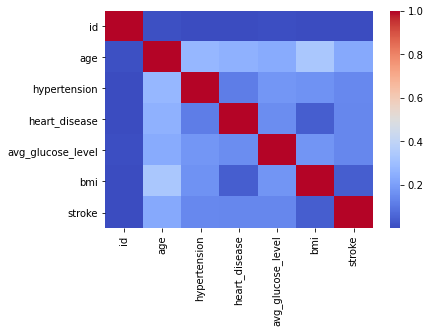

In [22]:
# Visualize the correlations between all numerical data 
plt.figure()
sns.heatmap(stroke.corr(), cmap='coolwarm')
plt.show()

The following three blocks of code are identical to the code in the stroke-EDA. Since we performed random undersampling to even out the stroke vs. non-stroke populations in EDA, it is better to randomly shuffle and undersample the original stroke datasets rather than using the small undersampled dataset generated from the EDA file. The purpose of undersampling the stroke dataset in EDA is to visualize the relationship between risk factors and the presence of stroke with more convenience. Here, we would repeat the same undersampling procedure on the original data to generate more accurate predictions of stroke. 

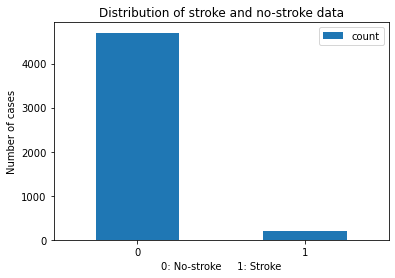

In [23]:
# Vizualize the stroke/no-stroke distribution 
stroke_compare = stroke["stroke"].groupby(stroke["stroke"]).agg({"count"})
stroke_compare = stroke_compare.reset_index()

stroke_compare.plot.bar(x = "stroke", y = "count")
plt.title("Distribution of stroke and no-stroke data")
plt.xticks(rotation = 0)
plt.xlabel("0: No-stroke     1: Stroke")
plt.ylabel("Number of cases")
plt.show()

In [24]:
# Compare the number of cases of stroke and no-stroke
stroke_compare

,stroke,count
0,0,4700
1,1,209


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


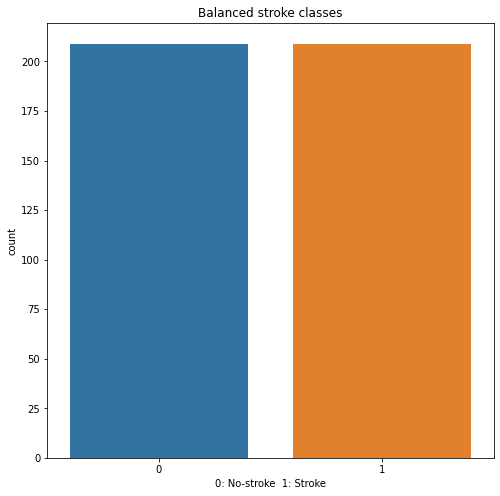

In [25]:
# Perform undersampling on the dataset to make 50% stroke vs. 50% no-stroke cases

# Shuffle the Dataset.
shuffled_stroke = stroke.sample(frac=1,random_state=4)

# Put all the  class in a separate dataset.
has_stroke = shuffled_stroke.loc[shuffled_stroke['stroke'] == 1]

# Randomly select 209 observations from the no-stroke class (majority class)
no_stroke = shuffled_stroke.loc[shuffled_stroke['stroke'] == 0].sample(n=209,random_state=42)

# Concatenate both dataframes again
normalized_stroke = pd.concat([has_stroke, no_stroke])

# Plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('stroke', data = normalized_stroke)
plt.title('Balanced stroke classes')
plt.xlabel("0: No-stroke  1: Stroke")
plt.show()

In [26]:
# Split the data into training and test sets
X = normalized_stroke[['age', 'hypertension','heart_disease', 'avg_glucose_level']]
y = normalized_stroke["stroke"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 7,
                                                    stratify = y
                                                   )

### RandomForestClassifier - stroke dataset

In [27]:
# Build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [28]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.717391304347826


In [29]:
# Get the classification report for the model 
y_pred = rf.predict(X_test)

target_names = ['Non Stroke','Stroke']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Non Stroke       0.70      0.75      0.73        69
      Stroke       0.73      0.68      0.71        69

    accuracy                           0.72       138
   macro avg       0.72      0.72      0.72       138
weighted avg       0.72      0.72      0.72       138



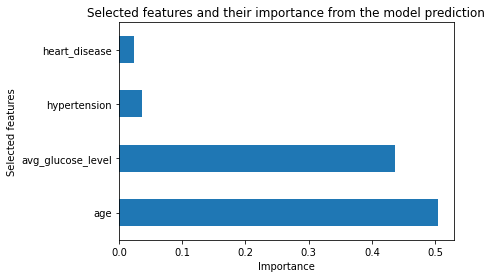

In [30]:
# Visualize the most important features that help predict the presence of stroke. 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title("Selected features and their importance from the model prediction")
plt.xlabel("Importance")
plt.ylabel("Selected features")
plt.show()

>Summary: The RandomForest Classifier model's accuracy to predict the presence of strokes was approximate 72%. Based on the classification report, the f-1 score for both CVD and no CVD was around 0.72. Since the f-1 score was calculated based on precision and recall, we could say that an f-1 score of around 0.72 means that we have low false positive and false negative predictions. The most important selected features from this model were age and average glucose level. 

### RandomForestRegression - stroke dataset

In [31]:
# Build the regressor
rf = RandomForestRegressor(n_estimators = 500, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=7)

In [32]:
# Predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The probability of having stroke is: {}'.format(y_pred))

The probability of having stroke is: [0.988 0.06  0.    0.    0.506 0.    0.994 0.    0.948 0.666 0.778 0.
 0.31  0.    0.696 0.898 0.168 0.    0.012 0.47  0.72  0.956 0.994 0.984
 0.794 0.88  0.    0.012 0.846 0.29  0.93  0.088 0.232 0.    0.166 0.
 0.294 0.22  0.    0.714 0.802 0.998 0.744 0.262 0.88  0.932 0.952 0.
 0.162 0.676 0.924 0.    0.866 0.936 0.872 0.878 0.276 0.818 0.028 0.666
 0.41  0.416 0.914 0.734 0.952 0.    0.958 0.734 0.96  0.824 0.702 0.244
 0.768 0.162 0.    0.    0.948 0.    0.278 0.18  0.522 0.    0.786 0.936
 0.31  0.944 0.176 0.04  0.    0.452 0.012 0.244 0.79  0.    0.842 0.
 0.21  0.95  0.    0.344 0.898 0.    0.296 0.484 0.556 0.564 0.136 0.558
 0.376 0.366 0.18  0.97  0.872 0.778 0.972 0.804 0.978 0.436 0.046 0.14
 0.    0.    0.828 0.768 0.324 0.    0.65  0.688 0.48  0.048 0.25  0.854
 0.484 0.    0.128 0.    0.856 0.928]


In [33]:
# Evaluate the Predictions
mse = mean_squared_error(y_test, y_pred)

print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.18323513043478262


> Summary: The RandomForestRegression model could help predict the possibility of having strokes. The mean squared error of this model, 0.183, was relatively low because it means that the model regression line was close to the data points of the test. 

### K-fold Cross Validation - stroke dataset 

In [34]:
# Initiate K-fold CV 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Evaluate model
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(" The K-fold Cross-Validation model has a %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 The K-fold Cross-Validation model has a 0.71 accuracy with a standard deviation of 0.09


### SVM model - stroke dataset 

In [35]:
# Use the copy from the original dataset
X_train_ = X_train.copy()
X_test_  = X_test.copy()

In [36]:
# Normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train_[['age', 'avg_glucose_level']])

X_train_[['age', 'avg_glucose_level']] = scaler.transform(X_train_[['age', 'avg_glucose_level']])

In [37]:
# View the prepared data
X_train_.head(10)

,age,hypertension,heart_disease,avg_glucose_level
4221,0.771744,0,0,-0.359609
163,0.815966,0,0,-0.824473
3825,-1.395153,0,0,-0.295345
2164,-1.704709,0,0,-0.763353
3448,-2.383965,0,0,-0.692977
53,0.639076,0,0,1.735948
4293,-0.687595,0,0,-0.993340
4,1.125523,0,0,1.118283
43,0.948633,1,0,0.034181
37,0.196853,1,0,1.586640


In [38]:
# Initialize the classifier
svm = SVC() 
svm.fit(X_train_, y_train) 

SVC()

In [39]:
# Encode & scale the new/test data
X_test_[['age', 'avg_glucose_level']] = scaler.transform(X_test_[['age', 'avg_glucose_level']]) 


# Predict the labels for the test set
y_pred   = svm.predict(X_test_)

print(f'The predicted presence of a stroke is: {y_pred}.')

The predicted presence of a stroke is: [1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1].


In [40]:
# Evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test_, y_test)))

The accuracy of the model is: 0.7608695652173914


In [41]:
# Produce the classification report 
target_names = ["Non stroke", "Stroke"]
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Non stroke       0.76      0.77      0.76        69
      Stroke       0.76      0.75      0.76        69

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138



> Summary: Using the SVM model, we could see that the stroke prediction increased based on the classification report compared to the report generated from the RandomForestClassifier. The f-1 score of this model also increased slightly. 

In [42]:
params = {'C': np.arange(1,10),     
          'kernel': ('linear','poly','rbf'),
          'gamma': np.arange(1,5)}

svm = SVC()

# Initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5) 
svm_grid.fit(X_train_, y_train)

print(f'The best parameters from the model is {svm_grid.best_params_}.')
print(f'The best score that was obtained from the model is {svm_grid.best_score_}.')

The best parameters from the model is {'C': 2, 'gamma': 1, 'kernel': 'rbf'}.
The best score that was obtained from the model is 0.7535714285714286.


In [43]:
params = {'C': np.arange(1,10),     
          'kernel': ('linear','poly','rbf'),
          'gamma': np.arange(1,5)}

svm = SVC()

# Initialize Grid Search with Cross Validation and return the training score
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True) 
svm_grid.fit(X_train_, y_train)

print(f'The best parameters from the model is {svm_grid.best_params_}.')
print(f'The best score that was obtained from the model is {svm_grid.best_score_}.')

The best parameters from the model is {'C': 2, 'gamma': 1, 'kernel': 'rbf'}.
The best score that was obtained from the model is 0.7535714285714286.


In [44]:
# Display the cv results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]

,mean_train_score,std_train_score,mean_test_score,std_test_score
14,0.788393,0.012500,0.753571,0.034626
8,0.807143,0.011080,0.753571,0.047110
2,0.781250,0.013541,0.750000,0.033882
5,0.794643,0.008470,0.750000,0.039123
0,0.758036,0.008657,0.750000,0.031944
...,...,...,...,...
104,0.850893,0.007254,0.685714,0.060398
71,0.858929,0.007784,0.682143,0.055787
83,0.861607,0.006313,0.675000,0.060187
107,0.867857,0.013122,0.675000,0.060187


> Summary: After a few hyperparameter tunings, we could see that the best mean_test_score is 0.7536, and the corresponding mean_train_score is 0.7884. Although these scores are not perfectly high, they still represented moderate to high SVM model prediction of the presence of strokes. Moreover, the difference between these parameters is small, and thereby it is unlikely the model is underfitting or overfitting.

##### Use the best hyperparameter obtained above to test the accuracy of test set

In [45]:
# Initialize the classifier
svm = SVC(C = 2, gamma= 1, kernel= 'rbf') 
svm.fit(X_train_, y_train) 

SVC(C=2, gamma=1)

In [46]:
# Predict the labels for the test set
y_pred   = svm.predict(X_test_)

print(f'The predicted VB is: {y_pred}.')

The predicted VB is: [1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1].


In [47]:
# Evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test_, y_test)))

The accuracy of the model is: 0.7753623188405797


> Summary: When applying the best hyperparameters to the model, the model accuracy increased to 77.5%, compared to the previous 76.1%. Therefore, the SVM model is not underfitting or overfitting. 